## 목표

> 2017년에는 어떤 장르의 게임을 어떤 플랫폼에서 출시 할 것인가?
>
### 목표를 이루기 위해 찾아봐야 할 내용

>
>1. 연도별 게임의 트렌드
>
>2. 인기 많았던 게임의 플랫폼 추세
>
>3. 출고량이 높은 게임에 대한 분석 및 시각화 프로세스
> 
>4. 지역별 인기 있는 게임장르
>
>(2000년 이후의 데이터로 분석 )
>
### 기획

>1. 데이터 탐색, 이해(EDA) & 전처리
>2. 데이터 정제(Feature Engineering)
>3. 데이터 분석
 - Business Insight
>4. 결과

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

#1. 데이터 탐색, 이해(EDA) & 전처리#

### **Data Description**

- `Name` : 게임의 이름입니다.
- `Platform` : 게임이 지원되는 플랫폼의 이름입니다.
- `Year` : 게임이 출시된 연도입니다.
- `Genre` : 게임의 장르입니다.
- `Publisher` : 게임을 배급한 회사입니다.
- `NA_Sales` : 북미지역에서의 출고량입니다.
- `EU_Sales` : 유럽지역에서의 출고량입니다.
- `JP_Sales` : 일본지역에서의 출고량입니다.
- `Other_Sales` : 기타지역에서의 출고량입니다.

In [2]:
# 데이터 업로드
from google.colab import files
files.upload()

df = pd.read_csv('vgames2.csv')

df.info()
# 16598개의 행
# Year, Genre, Publisher 결측치

df = df.iloc[:,1:]
# Unnamed: 0 컬럼 삭제

df[df['Genre'].isnull()]
df[df['Year'].isnull()]
df[df['Publisher'].isnull()]
# Genre결측치 파악 - 50개 (결측치 삭제)
# Year결측치 파악 - 271개 (결측치 삭제)
# Publisher결측치 파악 - 58개 (결측치 삭제)
# 결측치가 총 16598개라서 미미하기때문에 삭제해도 큰 영향이 없다.

df = df.dropna()
df.info()
# 16241개의 row로 분석 시작

df_du = df[df.duplicated()]
df_du
# 중복데이터 없음.

df.head()

Saving vgames2.csv to vgames2.csv
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   16598 non-null  int64  
 1   Name         16598 non-null  object 
 2   Platform     16598 non-null  object 
 3   Year         16327 non-null  float64
 4   Genre        16548 non-null  object 
 5   Publisher    16540 non-null  object 
 6   NA_Sales     16598 non-null  object 
 7   EU_Sales     16598 non-null  object 
 8   JP_Sales     16598 non-null  object 
 9   Other_Sales  16598 non-null  object 
dtypes: float64(1), int64(1), object(8)
memory usage: 1.3+ MB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 16241 entries, 0 to 16597
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         16241 non-null  object 
 1   Platform     16241 non-null  object 
 2   Year      

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0,0,0
1,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0,0,0.01
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0,0,0.02,0
3,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0,0,0
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0,0.04


In [3]:
# 단위(M)이 있는 데이터는 M 삭제
df['NA_Sales'] = df['NA_Sales'].str.replace('M', '')
df['EU_Sales'] = df['EU_Sales'].str.replace('M', '')
df['JP_Sales'] = df['JP_Sales'].str.replace('M', '')
df['Other_Sales'] = df['Other_Sales'].str.replace('M', '')

# column에서 단위(K)가 붙어있는 데이터만 호출하여 데이터프레임을 구성하고 les 변수에 저장  
les_NA = df.NA_Sales.str.contains('K')
# K 삭제 후 그 데이터에 0.001 곱하기
les_NA = les_NA.replace('K', '')
les_NA = les_NA*0.001
# 원본데이터에 다시 입력
df['NA_Sales'].loc[df.NA_Sales.str.contains('K')] = les_NA

les_EU = df.EU_Sales.str.contains('K')
les_EU = les_EU.replace('K', '')
les_EU = les_EU*0.001
df['EU_Sales'].loc[df.EU_Sales.str.contains('K')] = les_EU

les_JP = df.JP_Sales.str.contains('K')
les_JP = les_JP.replace('K', '')
les_JP = les_JP*0.001
df['JP_Sales'].loc[df.JP_Sales.str.contains('K')] = les_JP

les_Other = df.Other_Sales.str.contains('K')
les_Other = les_Other.replace('K', '')
les_Other = les_Other*0.001
df['Other_Sales'].loc[df.Other_Sales.str.contains('K')] = les_Other

df.head(40)

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0,0,0
1,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0,0,0.01
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0,0,0.02,0
3,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0,0,0
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0,0.04
5,Power Pro Kun Pocket 8,DS,2005.0,Sports,Konami Digital Entertainment,0,0,0.14,0
6,JASF: Jane's Advanced Strike Fighters,PC,2011.0,Simulation,Deep Silver,0.02,0.01,0,0
7,Samurai Warriors: State of War,PSP,2005.0,Action,Tecmo Koei,0.07,0,0.11,0.01
8,Imabikisou,PS3,2007.0,Adventure,Sega,0,0,0.04,0
9,The Penguins of Madagascar: Dr. Blowhole Retur...,PS3,2011.0,Action,THQ,0.04,0.03,0,0.01


In [4]:
# Year 'int'로 변경
df['Year'] = df['Year'].astype(int)

# Sales 컬럼들 'float'로 변경
df['NA_Sales'] = df['NA_Sales'].astype('float')
df['EU_Sales'] = df['EU_Sales'].astype('float')
df['JP_Sales'] = df['JP_Sales'].astype('float')
df['Other_Sales'] = df['Other_Sales'].astype('float')

# 출고량의 단위가 백만(장)이라서 *1,000,000을 해줌으로써 값을 한번에 알기 편하게 해줌.
mil_NA = df.NA_Sales
mil_NA = mil_NA*1000000
df['NA_Sales'] = mil_NA

mil_EU = df.EU_Sales
mil_EU = mil_EU*1000000
df['EU_Sales'] = mil_EU

mil_JP = df.JP_Sales
mil_JP = mil_JP*1000000
df['JP_Sales'] = mil_JP

mil_Other = df.Other_Sales
mil_Other = mil_Other*1000000
df['Other_Sales'] = mil_Other
# 출고량 단위(장)

# Sales컬럼들 'int'로 변경
df['NA_Sales'] = df['NA_Sales'].astype(int)
df['EU_Sales'] = df['EU_Sales'].astype(int)
df['JP_Sales'] = df['JP_Sales'].astype(int)
df['Other_Sales'] = df['Other_Sales'].astype(int)

df.describe()
# 연도에 최솟값이 0으로 되어있음 -> 찾아보니 0 : 2000년, 16 : 2016년 등으로 고쳐야 함.
df['Year'] = df['Year'].replace({0: 2000, 1:2001, 2:2002, 3:2003, 4:2004, 5:2005, 6:2006, 7:2007, 8: 2008, 9:2009, 10:2010, 11:2011, 12:2012, 13:2013, 14:2014, 15:2015, 16:2016, 96:1996, 97:1997, 98:1998, 86:1986, 95:1995, 94:1994})

# 2016년 이후로 자료값이 없어서 2017년도, 2020년도 삭제
df_idx17 = df[df['Year']==2017].index
df_idx20 = df[df['Year']==2020].index
df = df.drop(df_idx17)
df = df.drop(df_idx20)
df['Year'].unique()
# 1980년 ~ 2016년 자료


array([2008, 2009, 2010, 2005, 2011, 2007, 2001, 2003, 2006, 2014, 2015,
       2002, 1997, 2013, 1996, 2004, 2000, 1984, 1998, 2016, 1985, 1999,
       1995, 1993, 2012, 1987, 1982, 1994, 1990, 1992, 1991, 1983, 1988,
       1981, 1989, 1986, 1980])

#2. 데이터 정제(Feature Engineering)

In [5]:
# 게임별 Total_Sales 컬럼 만들기
df['Total_Sales'] = df['NA_Sales'] + df['EU_Sales'] + df['JP_Sales'] + df['Other_Sales']

df = df.reset_index(drop=True)
df # 연도, Sales컬럼들 모두 정리

pd.options.display.float_format = '{:.5f}'.format
# 지수표현 정리

df #(16237, 10)

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
0,Candace Kane's Candy Factory,DS,2008,Action,Destineer,40000,0,0,0,40000
1,The Munchables,Wii,2009,Action,Namco Bandai Games,170000,0,0,10000,180000
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010,Adventure,Alchemist,0,0,20000,0,20000
3,Deal or No Deal: Special Edition,DS,2010,Misc,Zoo Games,40000,0,0,0,40000
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010,Platform,D3Publisher,120000,90000,0,40000,250000
...,...,...,...,...,...,...,...,...,...,...
16232,Ice Age 2: The Meltdown,GC,2006,Platform,Vivendi Games,150000,40000,0,10000,200000
16233,Rainbow Islands: Revolution,PSP,2005,Action,Rising Star Games,10000,0,0,0,10000
16234,NBA 2K16,PS3,2015,Sports,Take-Two Interactive,440000,190000,30000,130000,790000
16235,Toukiden: The Age of Demons,PSV,2013,Action,Tecmo Koei,50000,50000,250000,30000,380000


#3. 데이터분석

데이터분석을 하기 전에 비디오게임 산업이 얼마나 성장했는지를 먼저 확인한다.

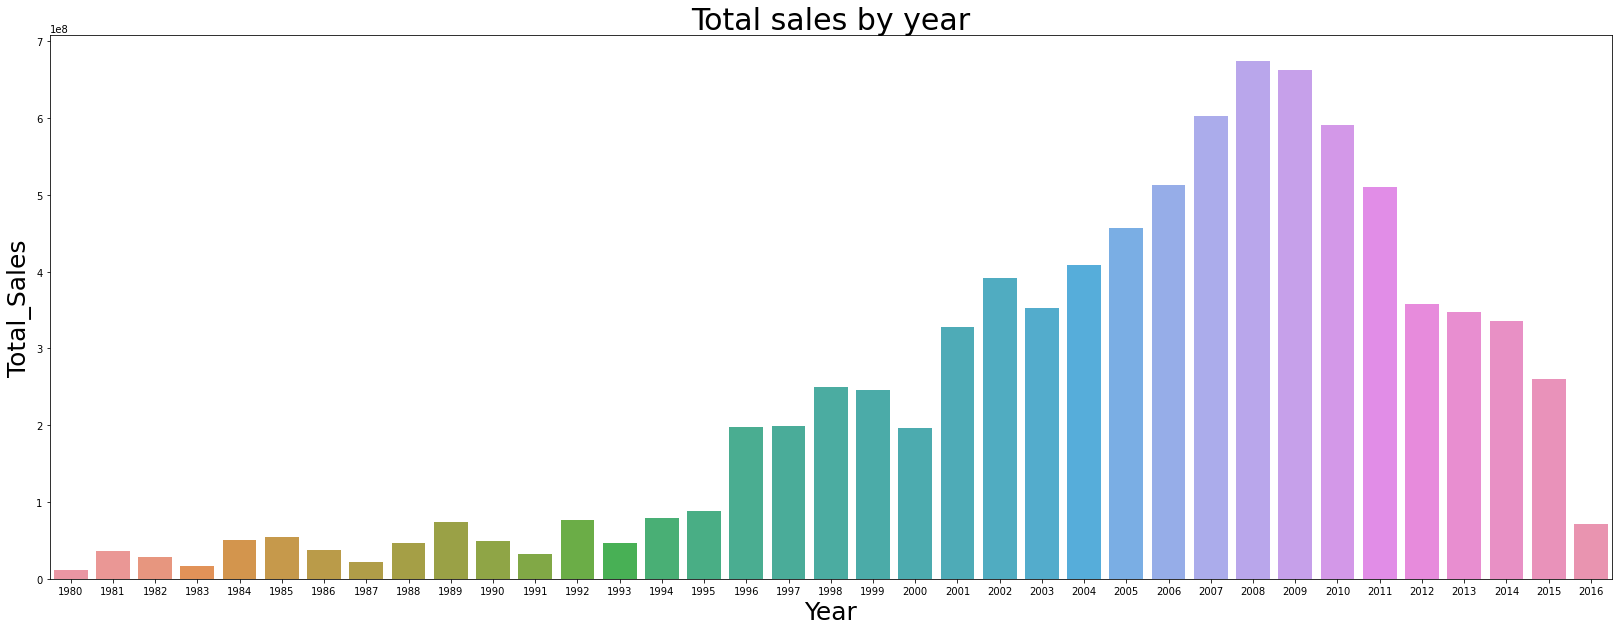

In [6]:
# 연도별 게임 전체 출고량
groups_year = df.groupby('Year').sum()
groups_year = groups_year[['Total_Sales']]
groups_year = groups_year.reset_index()
groups_year

plt.figure(figsize=(28, 10))
plt.title("Total sales by year", fontsize=30)
plt.xlabel("Year", fontsize=25)
plt.ylabel("Total_Sales", fontsize=25)
sns.barplot(x='Year', y='Total_Sales', data=groups_year);

- 1980년~1995년까지는 비디오게임 산업이 대중화가 시작되는 시기라 총 출고량이 적고, 1996년부터 늘다가 2001년부터 2011년까지 10년동안 호황기를 누렸다.
- 호황기인 이유는 비디오게임의 발전도 있었지만 경기침체로 집에서 여가를 즐기는 수요가 늘어 비디오 게임 '나홀로 호황' 이기도 했다.
- 2012년부터 2016년까지는 호황기에 비해 출고량이 줄어들었지만 '타임지'는 “비디오 게임 산업은 2010년대에 이미 10억달러 규모로 성장했고 이제 영화, TV 또는 음악보다 수익이 더 크다”며 취미가 틈새시장이 아닌 확실한 주류로 자리매김한 시기”라고 강조했다.
- 2012년부터 5년동안 호황기에 비해 반 이상 떨어진 부분을 의심해볼 수 있다. 뒤에서 알아보자.

 

------------------------------
**2000년도 이후 연도별**
- 비디오게임산업이 2000년도부터 빠르게 발전함에 따라서 2000년도부터 트렌드를 분석한다.

In [7]:
# 2000년대에 대한 데이터를 분석할 것이기 때문에 'Year'컬럼에서 2000년~2016년 데이터를 추출해준다.
dfrecent = df.loc[df['Year'] >= 2000]
dfrecent.reset_index(drop=True)
# (14269, 10)

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
0,Candace Kane's Candy Factory,DS,2008,Action,Destineer,40000,0,0,0,40000
1,The Munchables,Wii,2009,Action,Namco Bandai Games,170000,0,0,10000,180000
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010,Adventure,Alchemist,0,0,20000,0,20000
3,Deal or No Deal: Special Edition,DS,2010,Misc,Zoo Games,40000,0,0,0,40000
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010,Platform,D3Publisher,120000,90000,0,40000,250000
...,...,...,...,...,...,...,...,...,...,...
14264,Minna no Chizu 2,PSP,2007,Misc,Zenrin,0,0,20000,0,20000
14265,Ice Age 2: The Meltdown,GC,2006,Platform,Vivendi Games,150000,40000,0,10000,200000
14266,Rainbow Islands: Revolution,PSP,2005,Action,Rising Star Games,10000,0,0,0,10000
14267,NBA 2K16,PS3,2015,Sports,Take-Two Interactive,440000,190000,30000,130000,790000


In [ ]:
dfrecent['Genre'].value_counts()

Action          3012
Sports          1973
Misc            1558
Role-Playing    1283
Adventure       1169
Shooter         1113
Racing          1030
Simulation       756
Platform         715
Fighting         638
Strategy         546
Puzzle           476
Name: Genre, dtype: int64

In [ ]:
dfrecent['Platform'].value_counts()

DS      2125
PS2     2121
PS3     1299
Wii     1284
X360    1231
PSP     1193
PC       895
XB       799
GBA      784
GC       541
3DS      498
PSV      407
PS4      334
PS       272
XOne     212
WiiU     143
N64       69
DC        31
GB        27
WS         4
Name: Platform, dtype: int64

**5년기준 인기 있는 장르**

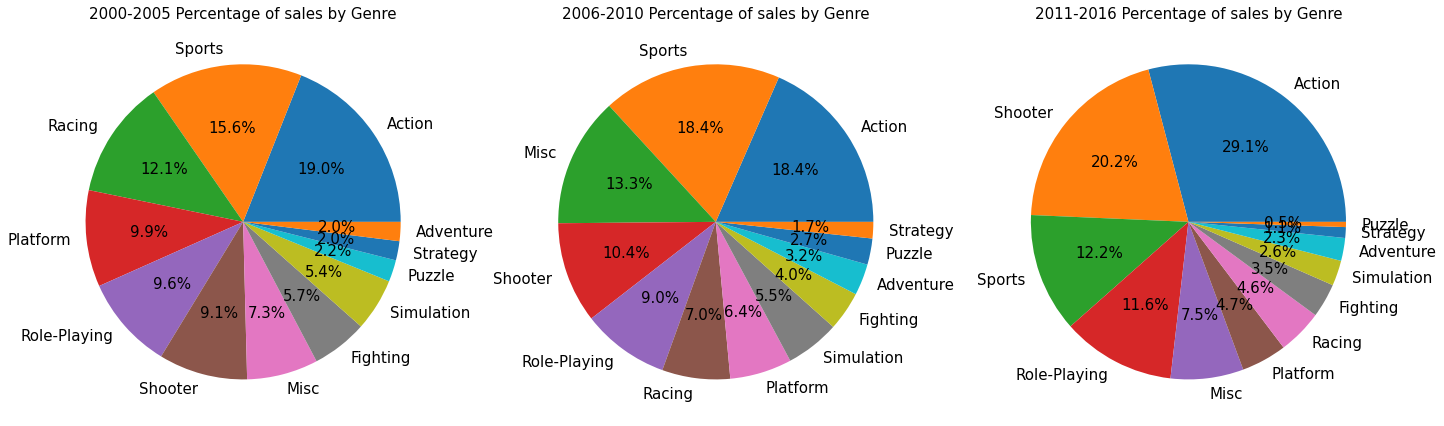

In [8]:
#5년기준 인기 있던 장르 -> Pie차트로 나타내기
fig, ax = plt.subplots(1, 3, figsize = (24,24))

# 2000-2005 장르별 출고량 비율
ratio0005 = dfrecent[(dfrecent['Year'] > 1999)&(dfrecent['Year'] <= 2005)].groupby('Genre')['Total_Sales'].sum().sort_values(ascending=False)
labels0005 = ratio0005.index
ax[0].pie(ratio0005,labels =labels0005, autopct='%.1f%%',textprops={'fontsize': 15})
ax[0].set_title('2000-2005 Percentage of sales by Genre',fontsize = 15)

# 2006-2010 장르별 출고량 비율
ratio0610 = dfrecent[(dfrecent['Year'] > 2005)&(dfrecent['Year'] <= 2010)].groupby('Genre')['Total_Sales'].sum().sort_values(ascending=False)
labels0610 = ratio0610.index
ax[1].pie(ratio0610,labels =labels0610, autopct='%.1f%%',textprops={'fontsize': 15})
ax[1].set_title('2006-2010 Percentage of sales by Genre',fontsize = 15)

# 2011-2016 장르별 출고량 비율
ratio1116 = dfrecent[(dfrecent['Year'] > 2010)&(dfrecent['Year'] <= 2016)].groupby('Genre')['Total_Sales'].sum().sort_values(ascending=False)
labels1116 = ratio1116.index
ax[2].pie(ratio1116,labels =labels1116, autopct='%.1f%%',textprops={'fontsize': 15})
ax[2].set_title('2011-2016 Percentage of sales by Genre',fontsize = 15)


plt.show()

- 2000-2005 : 1위 Action, 2위 Sports (2위부터 장르의 비율이 크게 차이나지않는다.)
 - 이 시기에 인기 있었던 액션게임, 스포츠게임 알아보자.
- 2006-2010 : 공동 1위 Action, Sports
 - 스포츠, 액션게임이 인기가 많다. 이 시기에 인기 있었던 스포츠게임, 액션게임 알아보자.
- 2011-2016 : 1위 Action, 2위 Shooter
 - 액션게임이 압도적으로 선호도가 높고, 슈팅게임이 2위로 치고올라옴. 이 시기에 인기 있었던 액션게임과 슈팅게임 알아보자.
---------

In [9]:
# 2000-2005년 TOP10 중 인기 있었던 액션게임, 스포츠게임
top0005= dfrecent[(dfrecent['Year'] <= 2005)&(dfrecent['Year'] >= 2000)].sort_values('Total_Sales', ascending=False).head(10)
top0005 = top0005.reset_index(drop=True)
top0005

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
0,Nintendogs,DS,2005,Simulation,Nintendo,9070000,11000000,1930000,2750000,24750000
1,Mario Kart DS,DS,2005,Racing,Nintendo,9810000,7570000,4130000,1920000,23430000
2,Grand Theft Auto: San Andreas,PS2,2004,Action,Take-Two Interactive,9430000,400000,410000,10570000,20810000
3,Brain Age: Train Your Brain in Minutes a Day,DS,2005,Misc,Nintendo,4750000,9260000,4160000,2049999,20219999
4,Grand Theft Auto: Vice City,PS2,2002,Action,Take-Two Interactive,8410000,5490000,470000,1780000,16150000
5,Pokemon Ruby/Pokemon Sapphire,GBA,2002,Role-Playing,Nintendo,6060000,3900000,5380000,500000,15840000
6,Brain Age 2: More Training in Minutes a Day,DS,2005,Puzzle,Nintendo,3440000,5360000,5320000,1180000,15300000
7,Gran Turismo 3: A-Spec,PS2,2001,Racing,Sony Computer Entertainment,6850000,5090000,1870000,1160000,14970000
8,Grand Theft Auto III,PS2,2001,Action,Take-Two Interactive,6990000,4510000,300000,1300000,13100000
9,Animal Crossing: Wild World,DS,2005,Simulation,Nintendo,2550000,3520000,5330000,880000,12280000


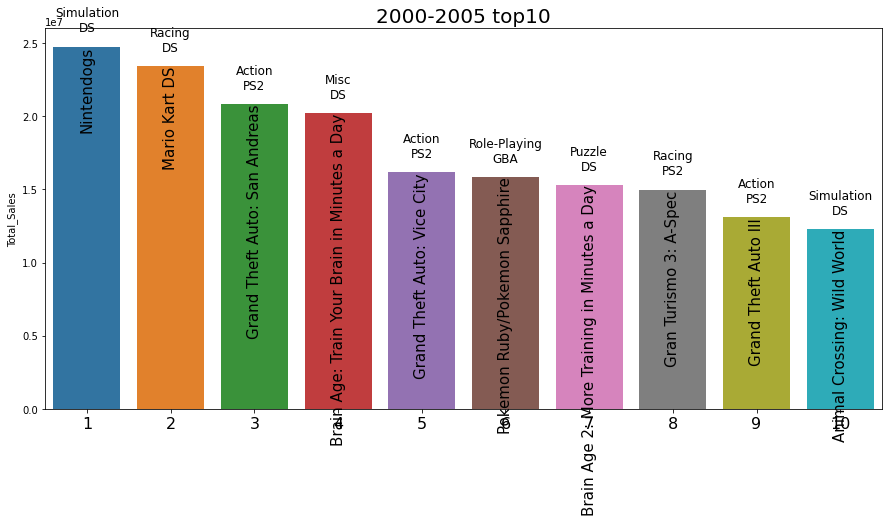

In [10]:
plt.figure(figsize=(15, 7))
a = sns.barplot(x = top0005.index, y='Total_Sales', data=top0005)
i = 0

for name, val, genre, platform in zip(top0005.Name, top0005.Total_Sales, top0005.Genre, top0005.Platform):
    a.text(x=i, y=val, s=(name), color='black', ha='center', va='top',rotation=90, fontsize=15)
    a.text(x=i, y=val, s=(str(genre) + '\n' + str(platform) + '\n'), color='black', ha='center', fontsize=12)
    i+=1
a.set_title('2000-2005 top10', fontsize=20)
plt.xticks(ticks=[x for x in range(10)], labels=[str(x) for x in range(1, 11)], fontsize=16)
plt.show()

- 출고량 TOP10에서 1위-4위, 5위-10위가 크게 차이 나지 않으며 여러 장르로 분포되어있는 것으로 보아 이 시기에는 특별한 트렌드가 있다기보다 비디오게임 장르가 골고루 인기있다.

In [11]:
# 2006-2010년 TOP10 중 인기 있었던 액션게임, 스포츠게임
top0610 = dfrecent[(dfrecent['Year'] <= 2010)&(dfrecent['Year'] >= 2006)].sort_values('Total_Sales', ascending=False).head(10)
top0610 = top0610.reset_index(drop=True)
top0610

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
0,Wii Sports,Wii,2006,Sports,Nintendo,41490000,29020000,3770000,8460000,82740000
1,Mario Kart Wii,Wii,2008,Racing,Nintendo,15850000,12880000,3790000,3310000,35830000
2,Wii Sports Resort,Wii,2009,Sports,Nintendo,15750000,11010000,3280000,2960000,33000000
3,New Super Mario Bros.,DS,2006,Platform,Nintendo,11380000,9230000,6500000,2900000,30010000
4,Wii Play,Wii,2006,Misc,Nintendo,14030000,9200000,2930000,2850000,29010000
5,New Super Mario Bros. Wii,Wii,2009,Platform,Nintendo,14590000,7060000,4700000,2260000,28610000
6,Wii Fit,Wii,2007,Sports,Nintendo,8940000,8029999,3600000,2150000,22719999
7,Wii Fit Plus,Wii,2009,Sports,Nintendo,9090000,8590000,2530000,1790000,22000000
8,Kinect Adventures!,X360,2010,Misc,Microsoft Game Studios,14970000,4940000,240000,1670000,21820000
9,Pokemon Diamond/Pokemon Pearl,DS,2006,Role-Playing,Nintendo,6420000,4520000,6040000,1370000,18350000


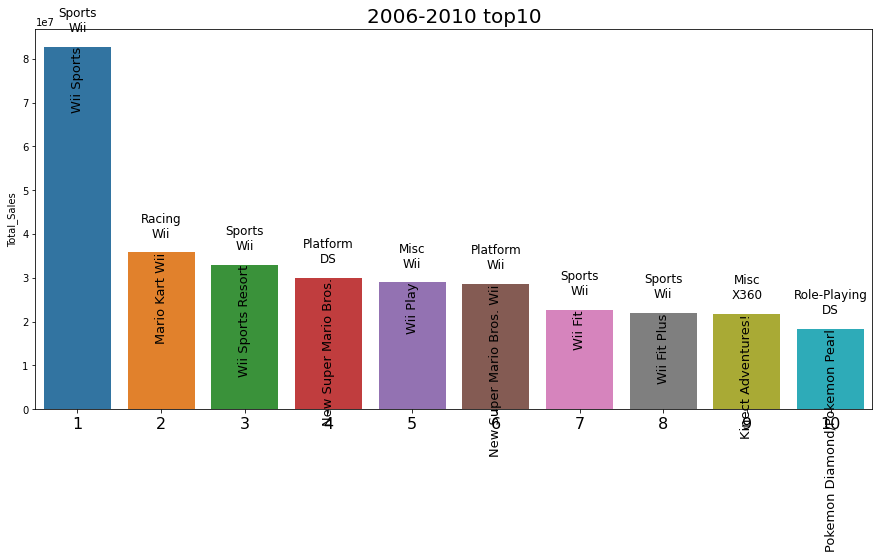

In [12]:
plt.figure(figsize=(15, 7))
a = sns.barplot(x = top0610.index, y='Total_Sales', data=top0610)
i = 0

for name, val, genre, platform in zip(top0610.Name, top0610.Total_Sales, top0610.Genre, top0610.Platform):
    a.text(x=i, y=val, s=(name), color='black', ha='center', va='top',rotation=90, fontsize=13)
    a.text(x=i, y=val, s=(str(genre) + '\n' + str(platform) + '\n'), color='black', ha='center', fontsize=12)
    i+=1
a.set_title('2006-2010 top10', fontsize=20)
plt.xticks(ticks=[x for x in range(10)], labels=[str(x) for x in range(1, 11)], fontsize=16)
plt.show()

- 2006년에 출시한 닌텐도 회사의 Wii가 2006년부터 2010년도까지 압도적으로 흥하면서 1위는 Sports.
- 9위를 제외한 TOP10이 닌텐도사 게임이 차지하면서 이 시기에는 닌텐도와 플랫폼 Wii의 호황기라고 할 수 있다.
- 장르만 보면 Sports, Racing, Misc, Platform, Role-playing 여러장르로 랭크되어있는데 Wii Sports라는 게임이 압도적으로 출고량이 높아서 Sports장르가 1위를 한 것으로 보인다.

In [13]:
# 2011-2016년 TOP10 중 인기 있었던 액션게임, 슈팅게임
top1116 = dfrecent[dfrecent.Year >= 2011].sort_values('Total_Sales', ascending=False).head(10)
top1116 = top1116.reset_index(drop=True)
top1116

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
0,Grand Theft Auto V,PS3,2013,Action,Take-Two Interactive,7010000,9270000,970000,4139999,21389999
1,Grand Theft Auto V,X360,2013,Action,Take-Two Interactive,9630000,5310000,60000,1380000,16380000
2,Call of Duty: Modern Warfare 3,X360,2011,Shooter,Activision,9030000,4280000,130000,1320000,14760000
3,Call of Duty: Black Ops 3,PS4,2015,Shooter,Activision,5770000,5810000,350000,2310000,14240000
4,Call of Duty: Black Ops II,PS3,2012,Shooter,Activision,4990000,5880000,650000,2520000,14040000
5,Call of Duty: Black Ops II,X360,2012,Shooter,Activision,8250000,4300000,70000,1120000,13740000
6,Call of Duty: Modern Warfare 3,PS3,2011,Shooter,Activision,5540000,5820000,490000,1620000,13470000
7,Mario Kart 7,3DS,2011,Racing,Nintendo,4740000,3910000,2670000,890000,12210000
8,Grand Theft Auto V,PS4,2014,Action,Take-Two Interactive,3800000,5810000,360000,2020000,11990000
9,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014,Role-Playing,Nintendo,4230000,3370000,3080000,650000,11330000


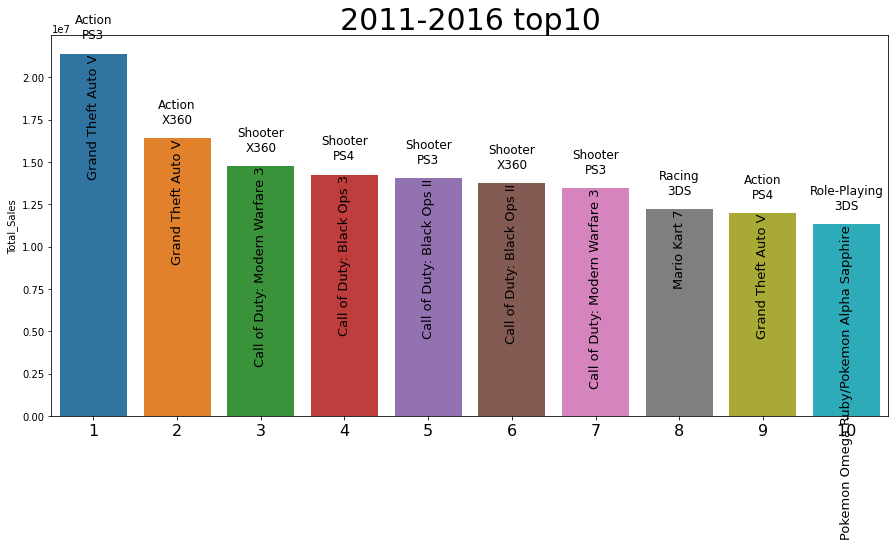

In [14]:
plt.figure(figsize=(15, 7))
a = sns.barplot(x = top1116.index, y='Total_Sales', data=top1116)

i = 0

for name, val, genre, platform in zip(top1116.Name, top1116.Total_Sales, top1116.Genre, top1116.Platform):
    a.text(x=i, y=val+2, s=(name), color='black', ha='center', va='top',rotation=90, fontsize=13)
    a.text(x=i, y=val-8, s=(str(genre) + '\n' + str(platform) + '\n'), color='black', ha='center', fontsize=12)
    i+=1
a.set_title('2011-2016 top10', fontsize=30)
plt.xticks(ticks=[x for x in range(10)], labels=[str(x) for x in range(1, 11)], fontsize=16)
plt.show()

- TOP10 중 1, 2, 9위가 Grand Theft Auto V 인 Action게임이다.
 - X360, PS시리즈 플랫폼
- 이어서 Call of Duty 시리즈인 슈팅게임이 3~7위를 기록했다.
 - 역시 X360, PS시리즈 플랫폼

- GTA시리즈인 액션게임은 2000년부터 꾸준히 인기가 있다.
- 1,2위와 5, 6위를 비교해보면 같은 게임일 때 PS3에서 출고량이 높지만 3, 7위를 비교해보면 같은 게임일 때 X360에서 출고량이 더 높은걸 알 수 있다. 
- 액션게임이나 슈팅게임은 PS3, X360 두 플랫폼 모두 출시하는 게 좋다고 볼 수 있다.
------

- 이렇게 알아보니 2006년~2010년도에 압도적으로 Wii가 흥하면서 게임트렌드를 분석하기 힘들다고 생각했다. 먼저 Wii의 연도별 출고량을 알아보자.

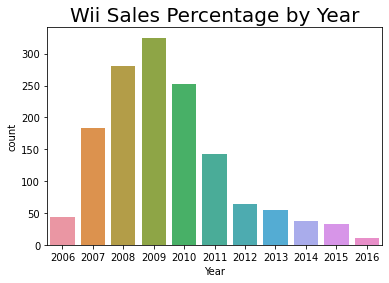

In [15]:
dfwii = df[df['Platform'].str.contains('Wii', na=False)]

sns.countplot(x="Year", data=dfwii)
plt.title("Wii Sales Percentage by Year", fontsize = 20)
plt.show()


- Wii는 출시일이 2006년 11월이기때문에 출고량이 낮을 수 밖에 없고, 2007년~2010년까지는 출고량이 높지만 2011년에는 전년도에 비해 반으로 줄어들고, 2012년부터는 출고량이 많이 떨어진 모습이다.
- Wii는 출시년도부터 5년동안 유행했고, 그 후에는 출고량이 많이 떨어졌다.
- 비디오게임 산업에서 닌텐도 Wii의 출시는 역대 가정용 게임기의 판매 기록 중 최고속도를 기록했지만 2009년 이후의 출고량이 높았던 북미에서도 일본과 마찬가지로 하강 노선을 걸으면서 2013년 10월 생산이 종료되었다.
- 2017년 게임설계 분석을 위해서 Wii는 제외하기로 했다.

**플랫폼 Wii제외 2000년도부터 데이터 분석**

In [16]:
# 2000년도부터 데이터 중 플랫폼 Wii 제외
dfwiidel = dfrecent[~dfrecent['Platform'].str.contains("Wii", na=False)]
dfwiidel = dfwiidel.reset_index(drop=True)
dfwiidel
# (12842, 10)

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
0,Candace Kane's Candy Factory,DS,2008,Action,Destineer,40000,0,0,0,40000
1,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010,Adventure,Alchemist,0,0,20000,0,20000
2,Deal or No Deal: Special Edition,DS,2010,Misc,Zoo Games,40000,0,0,0,40000
3,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010,Platform,D3Publisher,120000,90000,0,40000,250000
4,Power Pro Kun Pocket 8,DS,2005,Sports,Konami Digital Entertainment,0,0,140000,0,140000
...,...,...,...,...,...,...,...,...,...,...
12837,Minna no Chizu 2,PSP,2007,Misc,Zenrin,0,0,20000,0,20000
12838,Ice Age 2: The Meltdown,GC,2006,Platform,Vivendi Games,150000,40000,0,10000,200000
12839,Rainbow Islands: Revolution,PSP,2005,Action,Rising Star Games,10000,0,0,0,10000
12840,NBA 2K16,PS3,2015,Sports,Take-Two Interactive,440000,190000,30000,130000,790000


Wii 데이터를 제외시켜도 전체데이터의 총 출고량에 대한 데이터가 차이가 없는지 알아보기 위해서 T-test로 가설검정을 합니다.
T-test란? 두 집단의 평균차이를 검증하기 위한 분석방법

- 귀무가설 : 두 집단의 평균이 같다. (차이가 없다.)
- 대립가설 : 같지 않다. (차이가 있다.)
- P-value값이 유의수준 5% 즉 0.05보다 크면 귀무가설 채택. 즉 두 집단이 차이가 없다.
- P-value값이 0.05보다 작으면 대립가설 채택. 즉 두 집단이 차이가 있다.

In [27]:
# t-test

# 귀무가설 : wii플랫폼에 대한 데이터를 지웠을 때 총 데이터에 대한 Total_Sales가 변함이 없다.
# 대립가설 : wii플랫폼에 대한 데이터를 지웠을 때 총 데이터에 대한 Total_Sales가 변함이 있다.

dfwiideltotal =dfwiidel['Total_Sales']
dftotal = dfrecent['Total_Sales']
print(dfwiideltotal.mean())
# 473383.27145304467
print(dftotal.mean())
# 494636.9030065176

from scipy import stats

t_test1 = stats.ttest_ind(dfwiideltotal, dftotal)
print(t_test1)
# Ttest_indResult(statistic=-1.311959491722945, pvalue=0.189544912034341)
# p-value는 유의수준 0.05값보다 크므로 귀무가설은 채택, 대립가설은 기각된다.




473383.27145304467
494636.9030065176
Ttest_indResult(statistic=-1.311959491722945, pvalue=0.189544912034341)


P-value가 0.1895 정도로 유의수준 0.05보다 크므로 비유의적이다 라고 할 수 있고 차이가 없다라고 할 수 있다. 그러므로 Wii를 제외한 데이터로 분석 가능하다.

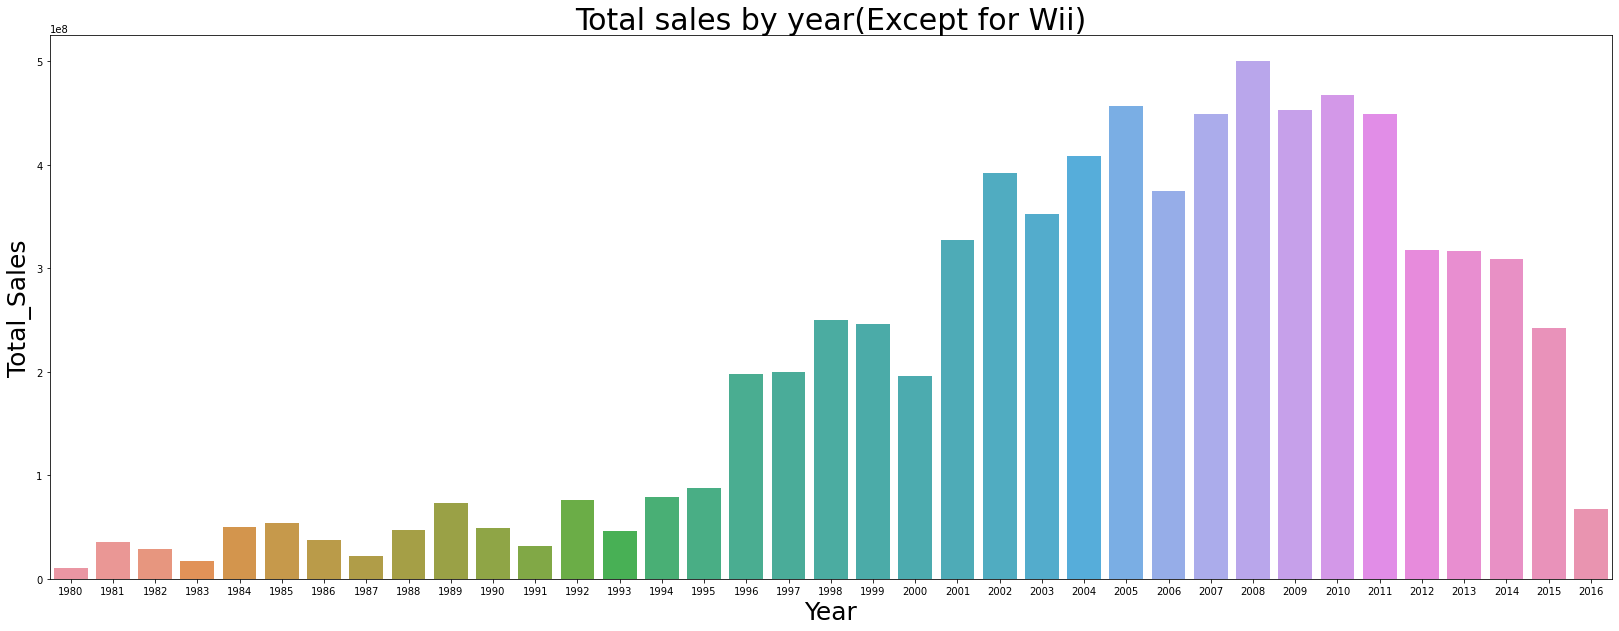

In [17]:
dfwiidel1 = df[~df['Platform'].str.contains("Wii", na=False)]
dfwiidel1 = dfwiidel1.reset_index(drop=True)
dfwiidel1

groups_year1 = dfwiidel1.groupby('Year').sum()
groups_year1 = groups_year1[['Total_Sales']]
groups_year1 = groups_year1.reset_index()
groups_year1

plt.figure(figsize=(28, 10))
plt.title("Total sales by year(Except for Wii)", fontsize=30)
plt.xlabel("Year", fontsize=25)
plt.ylabel("Total_Sales", fontsize=25)
sns.barplot(x='Year', y='Total_Sales', data=groups_year1);

- Wii데이터를 제외시킨 후 1980년부터 2016년까지 연도별 총 비디오게임 출고량을 다시 보게되면 2006년부터 2011년(5년)의 데이터와 2012년부터 2016년(5년)의 데이터 차이가 줄었다고 볼 수 있다.

**5년기준 인기 있는 장르**

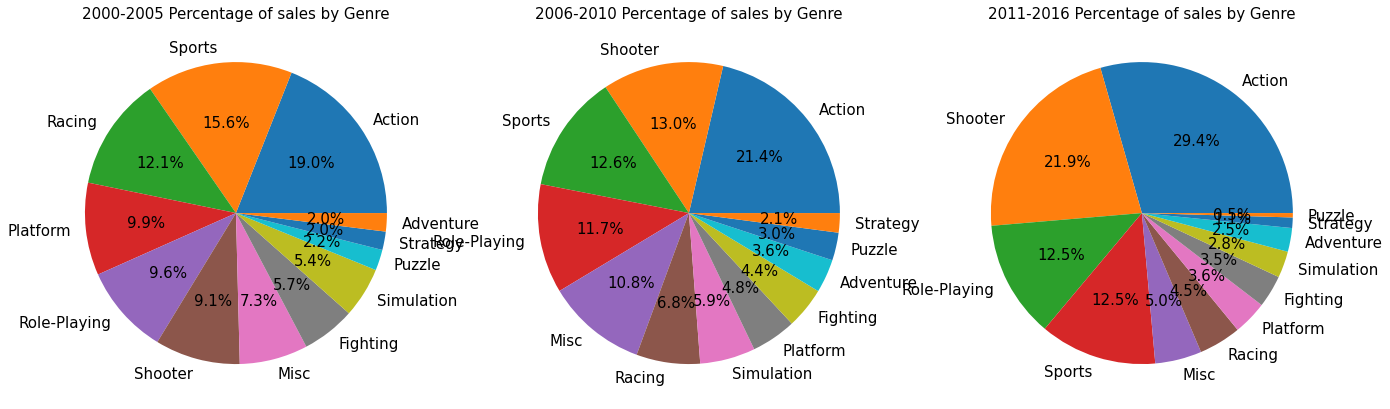

In [18]:
#5년기준 인기 있던 장르 -> Pie차트로 나타내기

fig, ax = plt.subplots(1, 3, figsize = (23,23))

# 2000-2005 장르별 출고량 비율
ratio0005 = dfwiidel[(dfwiidel['Year'] > 1999)&(dfwiidel['Year'] <= 2005)].groupby('Genre')['Total_Sales'].sum().sort_values(ascending=False)
labels0005 = ratio0005.index
ax[0].pie(ratio0005,labels =labels0005, autopct='%.1f%%',textprops={'fontsize': 15})
ax[0].set_title('2000-2005 Percentage of sales by Genre',fontsize = 15)

# 2006-2010 장르별 출고량 비율
ratio0610 = dfwiidel[(dfwiidel['Year'] > 2005)&(dfwiidel['Year'] <= 2010)].groupby('Genre')['Total_Sales'].sum().sort_values(ascending=False)
labels0610 = ratio0610.index
ax[1].pie(ratio0610,labels =labels0610, autopct='%.1f%%',textprops={'fontsize': 15})
ax[1].set_title('2006-2010 Percentage of sales by Genre',fontsize = 15)

# 2011-2016 장르별 출고량 비율
ratio1116 = dfwiidel[(dfwiidel['Year'] > 2010)&(dfwiidel['Year'] <= 2016)].groupby('Genre')['Total_Sales'].sum().sort_values(ascending=False)
labels1116 = ratio1116.index
ax[2].pie(ratio1116,labels =labels1116, autopct='%.1f%%',textprops={'fontsize': 15})
ax[2].set_title('2011-2016 Percentage of sales by Genre',fontsize = 15)


plt.show()

- 플랫폼 Wii를 삭제하고 다시 분석해보았다.
 - 2000-2005 : 1위가 액션, 2위가 스포츠게임,
 - 2006-2010 : 1위가 액션, 2위가 슈팅게임으로 올라옴
 - 2011-2016 : 1위가 압도적으로 액션, 2위도 높은 비율로 슈팅게임
- 10년동안 게임 트렌드의 양상이 비슷하게 나타난다.
 - 앞으로도 액션게임이나 슈팅게임이 인기가 있을 것이라고 예상된다.

**5년기준 인기 있는 플랫폼**

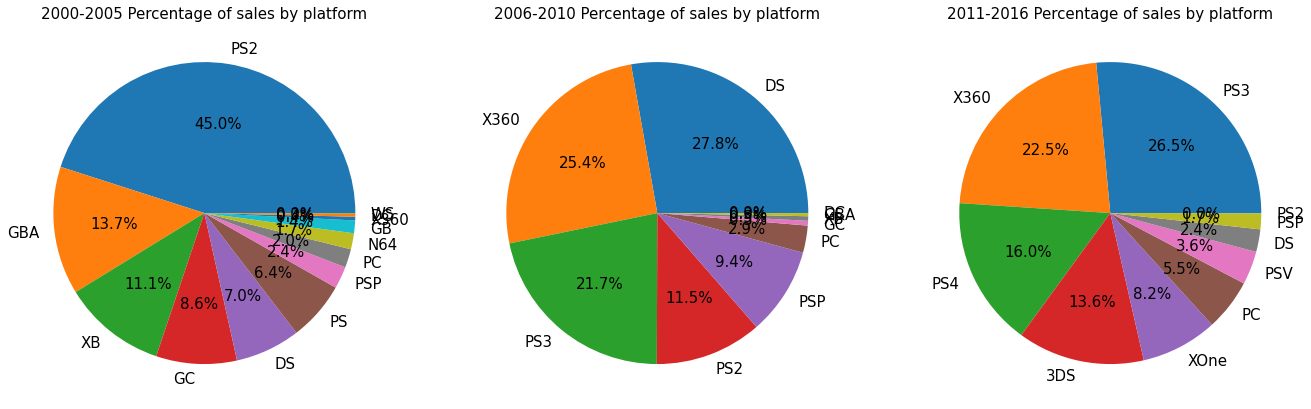

In [19]:
#5년기준 인기 있던 플랫폼 -> Pie차트로 나타내기
fig, ax = plt.subplots(1, 3, figsize = (23,23))
# 2000-2005 플랫폼별 출고량 비율
ratio0005 = dfwiidel[(dfwiidel['Year'] > 1999)&(dfwiidel['Year'] <= 2005)].groupby('Platform')['Total_Sales'].sum().sort_values(ascending=False)
labels0005 = ratio0005.index
ax[0].pie(ratio0005,labels =labels0005, autopct='%.1f%%',textprops={'fontsize': 15})
ax[0].set_title('2000-2005 Percentage of sales by platform',fontsize = 15)

# 2006-2010 플랫폼별 출고량 비율
ratio0610 = dfwiidel[(dfwiidel['Year'] > 2005)&(dfwiidel['Year'] <= 2010)].groupby('Platform')['Total_Sales'].sum().sort_values(ascending=False)
labels0610 = ratio0610.index
ax[1].pie(ratio0610,labels =labels0610, autopct='%.1f%%',textprops={'fontsize': 15})
ax[1].set_title('2006-2010 Percentage of sales by platform',fontsize = 15)

# 2011-2016 플랫폼별 출고량 비율
ratio1116 = dfwiidel[(dfwiidel['Year'] > 2010)&(dfwiidel['Year'] <= 2016)].groupby('Platform')['Total_Sales'].sum().sort_values(ascending=False)
labels1116 = ratio1116.index
ax[2].pie(ratio1116,labels =labels1116, autopct='%.1f%%',textprops={'fontsize': 15})
ax[2].set_title('2011-2016 Percentage of sales by platform',fontsize = 15)


plt.show()

- 2000년-2005년 -> 1위 압도적 : PS2, 2위 GBA, 3위 : XB
- 2006년-2010년 -> 1위 : DS, 2위 : X360, 3위 : PS3
- 2011년-2016년 -> 1위 : PS3, 2위 : X360, 3위 : PS4

## 위의 자료를 토대로 정리해보면 2000년도부터 액션게임이나 슈팅게임이 계속 인기가 많고, 2000년대 초반에는 PS2플랫폼의 출고량이 압도적으로 높았지만 나중에는 PS시리즈와 X360 두 플랫폼에서 출고량이 비슷해졌다.
 그러므로 PS시리즈의 PS3, PS4와 마이크로소프트의 XBOX360 두 플랫폼 모두 지원할 수 있는 액션게임이나 슈팅게임을 설계하는 것이 좋을 것 같다.
---------

**지역별 선호하는 게임장르**
- 액션게임, 슈팅게임을 만들면 어떤 지역에 잘 팔릴까?
- 지역에 따라서 선호하는 게임 장르가 다를까?


In [21]:
# 지역에 따라서 선호하는 게임 장르가 다를까? 
# wii플랫폼을 삭제한 최근 10년간의 데이터로 분석
df_genre = dfwiidel.groupby('Genre').sum()
df_genre = df_genre.iloc[:,1:]
df_genre 

,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
Genre,,,,,
Action,670092998,428093998,122554000,164668998,1385409994
Adventure,70972000,45203000,35746000,13586000,165507000
Fighting,143780999,67486000,39915000,29372000,280553999
Misc,233940000,128311000,68825000,51166999,482242999
Platform,197282999,110336999,40204000,33336000,381159998
Puzzle,54711999,36432000,22021000,8951000,122115999
Racing,232998998,170034000,22346000,63633000,489011998
Role-Playing,263837999,148362998,221624999,47340000,681165996
Shooter,463362999,278708997,20605000,95604000,858280996


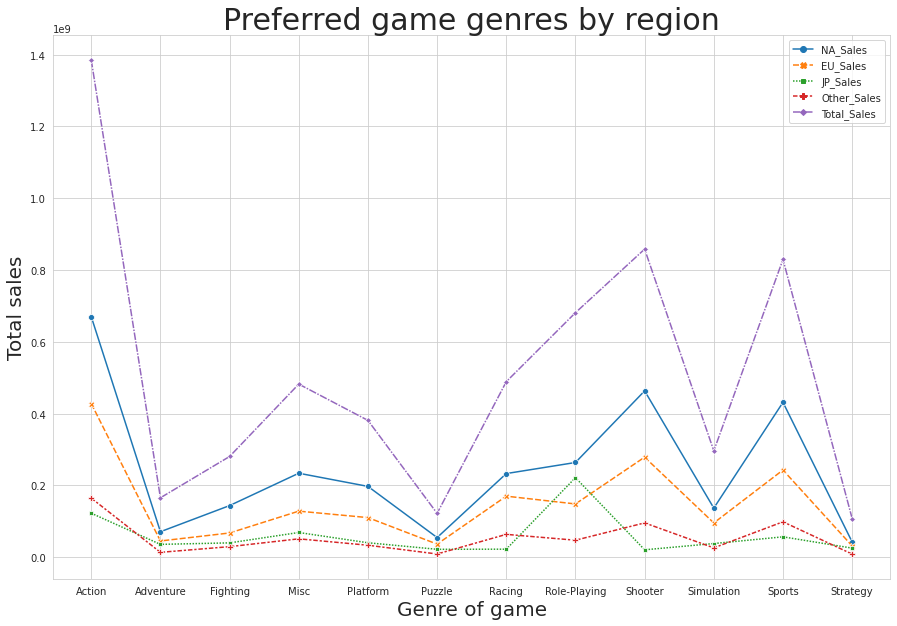

In [22]:
sns.set_style("whitegrid")
plt.figure(figsize=(15, 10))
plt.title("Preferred game genres by region", fontsize=30)
plt.xlabel("Genre of game", fontsize=20)
plt.ylabel("Total sales", fontsize=20)

sns.lineplot(data=df_genre, markers=True);

- 그래프를 보면 북미,유럽,기타지역에서 Action장르의 게임을 가장 선호하고,  Japan에서만 Role-Playing장르의 게임이 가장 선호된다는 것을 알 수 있다.

## 액션게임과 슈팅게임 모두 일본을 제외한 전 지역에서 인기가 있다고 판단할 수 있다.
**액션게임과 슈팅게임 중 자신있는 게임을 만들자.*

- TOP10에 압도적으로 출고량이 높았던 게임(시리즈물) 두 개 분석
 - Grand Theft Auto 시리즈(Action)
 - Call of Duty 시리즈(Shooter)

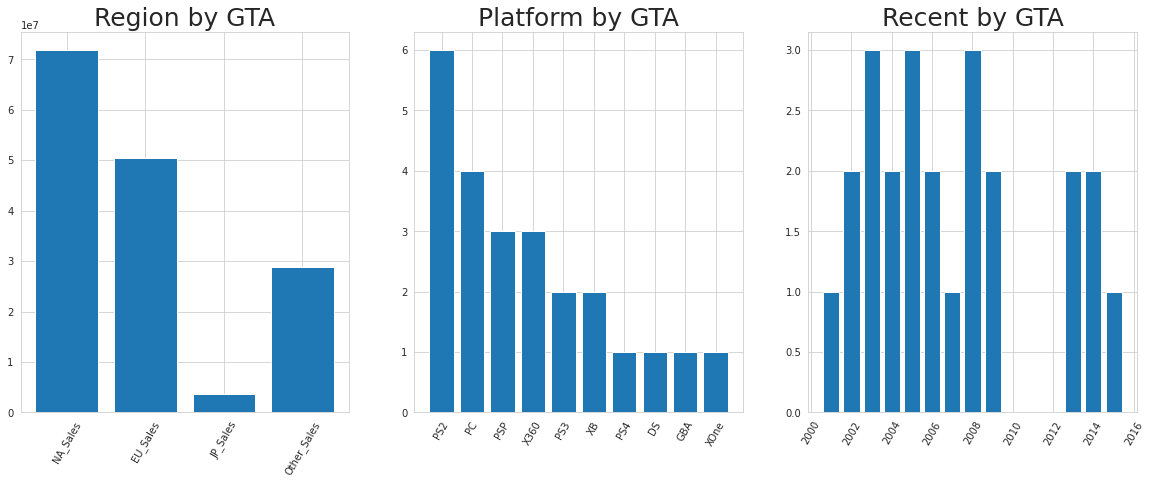

In [24]:
# GTA 분석
dfGTA = dfrecent[dfrecent['Name'].str.contains("Grand Theft Auto", na=False)]
dfGTA = dfGTA.reset_index(drop=True)

GTA_platform = dfGTA['Platform'].value_counts()
GTA_region = dfGTA[['NA_Sales','EU_Sales','JP_Sales','Other_Sales']].sum()
GTA_recent = dfGTA['Year'].value_counts()

fig, ax = plt.subplots(1, 3, figsize = (20,7))
ax[0].bar(GTA_region.index,GTA_region)
ax[0].set_title('Region by GTA',fontsize=25)
ax[1].bar(GTA_platform.index,GTA_platform)
ax[1].set_title('Platform by GTA',fontsize=25)
ax[2].bar(GTA_recent.index,GTA_recent)
ax[2].set_title('Recent by GTA',fontsize=25)
for i in range(0,3):
  ax[i].xaxis.set_tick_params(rotation=60)

plt.show()

- GTA는 북미지역과 유럽지역에서 높은 출고량을 보이고, 플랫폼 PS시리즈에서 잘 팔린다고 볼 수 있다.
- GTA는 1997년 첫 시리즈가 나온 후부터 2016년까지 꾸준히 인기가 많다.
- (2010, 2011, 2012년도에는 출시되지 않아서 데이터가 없다.)

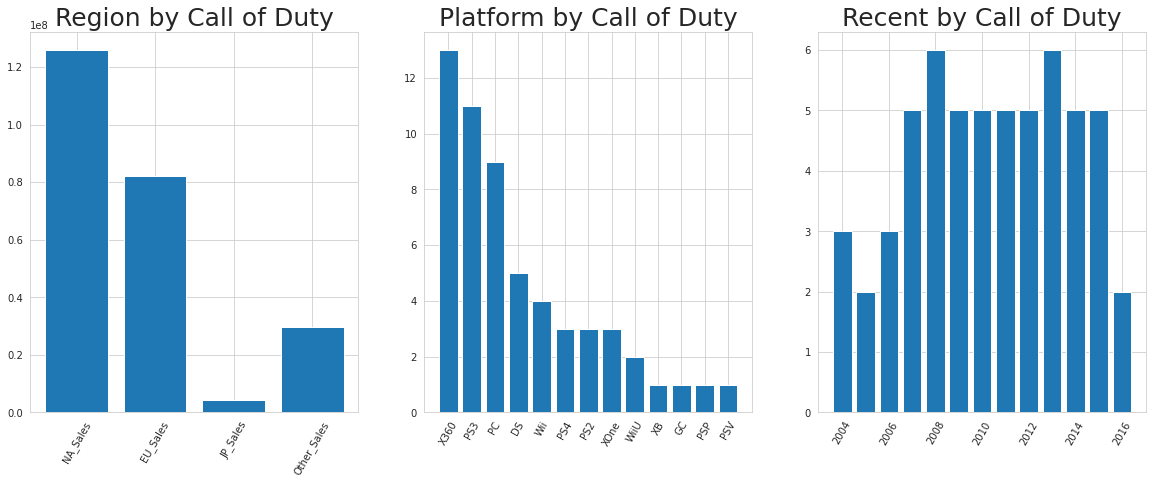

In [25]:
# Call of Duty 분석
dfCOD = dfrecent[dfrecent['Name'].str.contains("Call of Duty", na=False)]
dfCOD = dfCOD.reset_index(drop=True)

COD_platform = dfCOD['Platform'].value_counts()
COD_region = dfCOD[['NA_Sales','EU_Sales','JP_Sales','Other_Sales']].sum()
COD_recent = dfCOD['Year'].value_counts()

fig, ax = plt.subplots(1, 3, figsize = (20,7))
ax[0].bar(COD_region.index,COD_region)
ax[0].set_title('Region by Call of Duty',fontsize=25)
ax[1].bar(COD_platform.index,COD_platform)
ax[1].set_title('Platform by Call of Duty',fontsize=25)
ax[2].bar(COD_recent.index,COD_recent)
ax[2].set_title('Recent by Call of Duty',fontsize=25)
for i in range(0,3):
  ax[i].xaxis.set_tick_params(rotation=60)

plt.show()


- Call of Duty는 북미지역에서 높은 출고량을 보이고, 유럽지역에서도 인기가 많다.
- 플랫폼 X360에서 가장 높은 출고량을 보이고, PS3과 크게 차이가 나지 않는다.
- Call of Duty는 2003년 최초로 출시되었는데 2016년까지도 모든 시리즈가 인기가 많은 것으로 보인다.

#결론
>
>장르(Genre): Action or shooter
>
>플렛폼(Platform): PS시리즈, X360 두 플랫폼에 모두 출시
>
>출시지역: 북미지역
>
